<a href="https://colab.research.google.com/github/2303a52209/Statistical-Machine-Learning/blob/main/Stat_Ass_6_q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/diabetes_data_upload.csv')
print(data.head())

   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      

In [ ]:
X =data.iloc[:,:-1]
y =data.iloc[:,-1]
print("Features:\n",X.head())
print("Target:\n",y.head())

Features:
    Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity  
0              No              Yes     

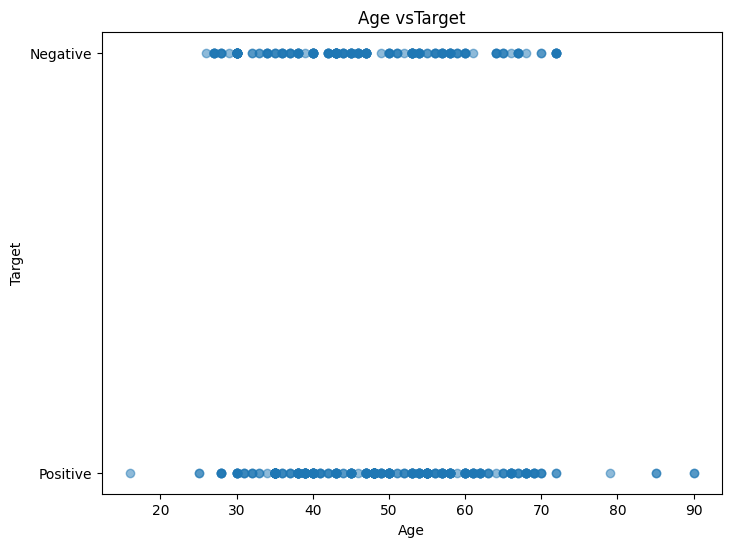

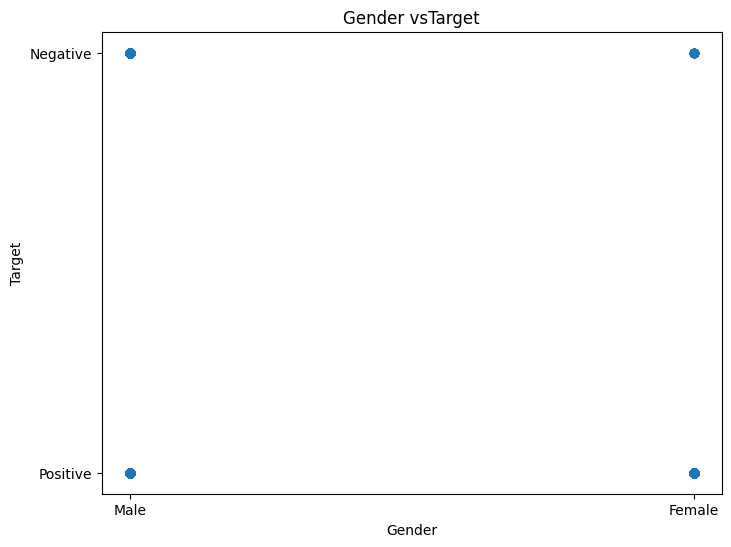

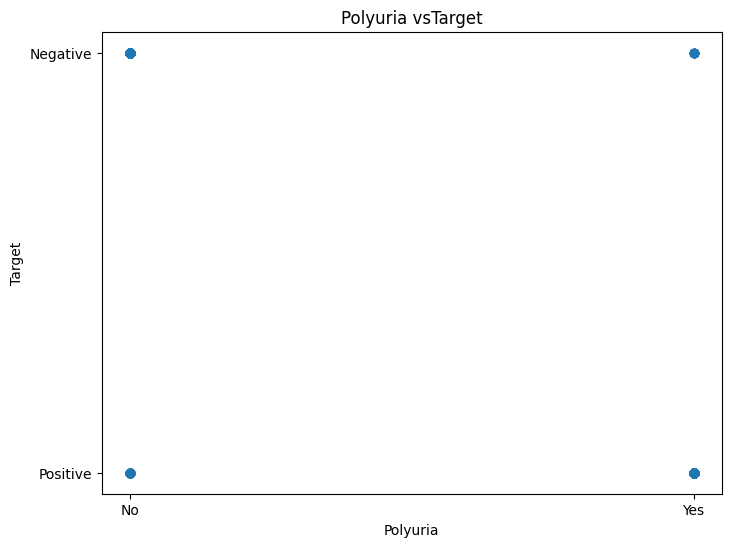

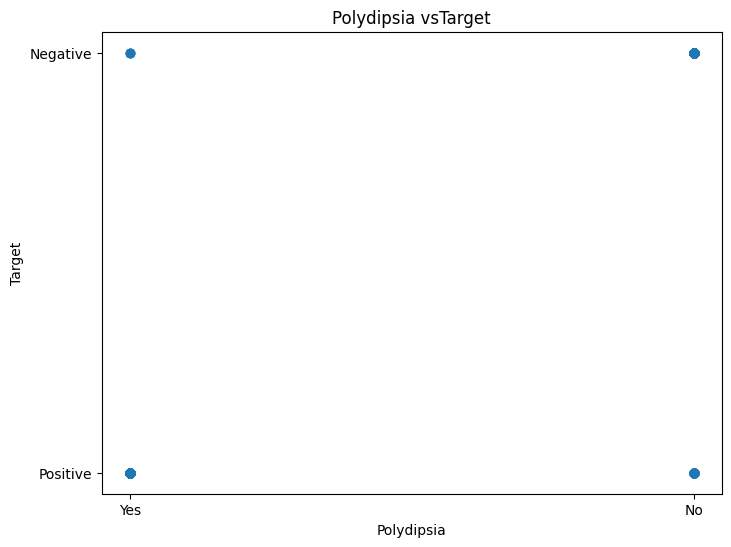

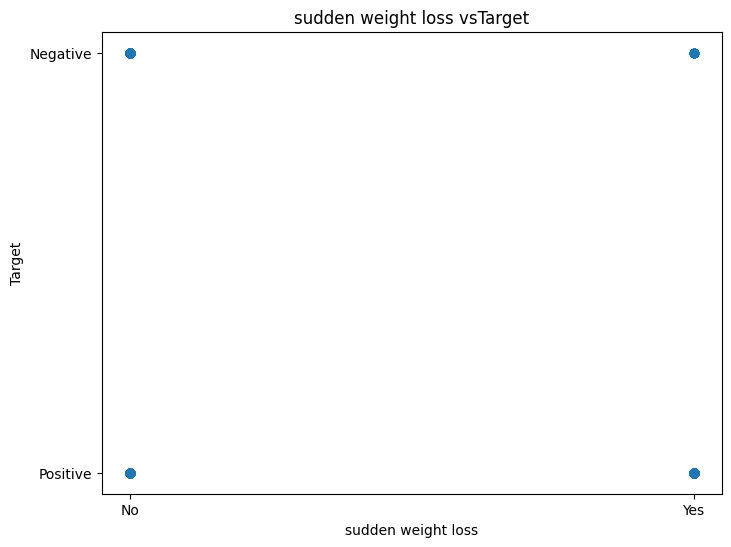

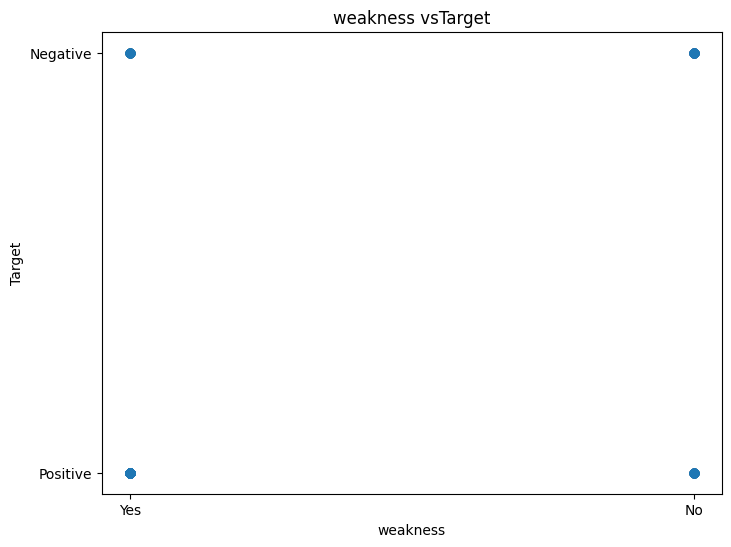

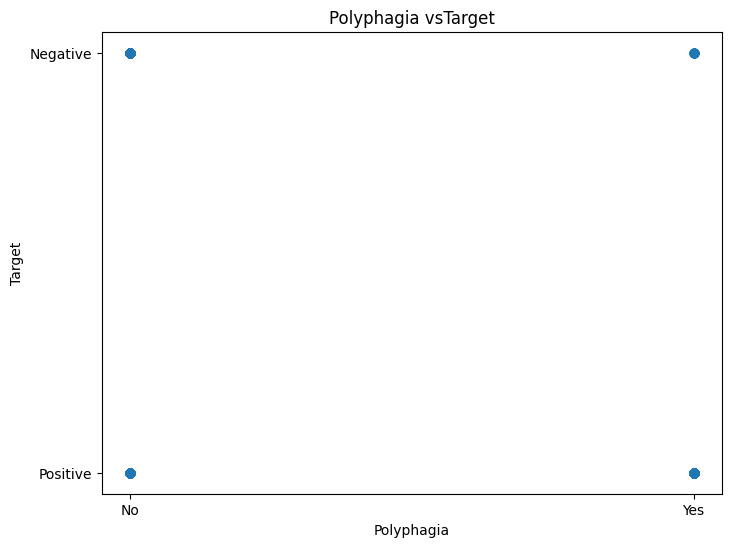

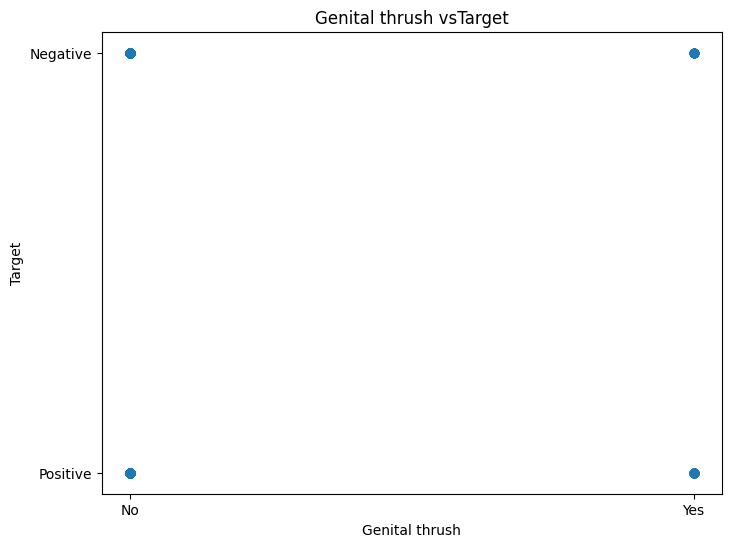

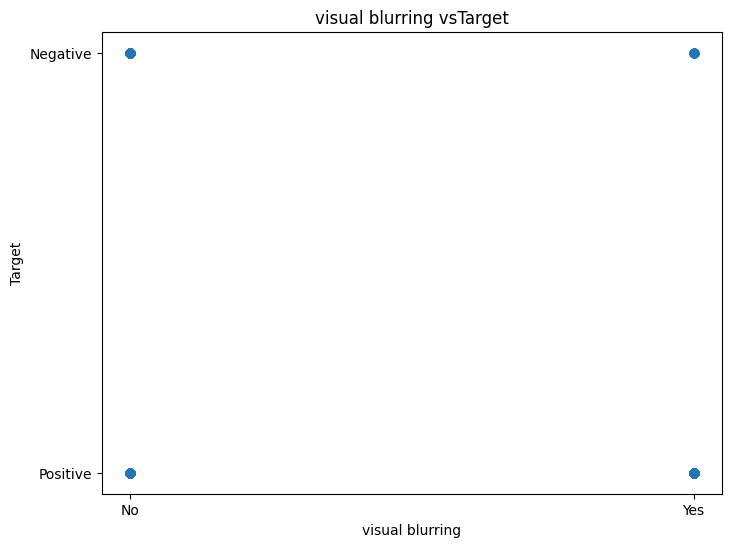

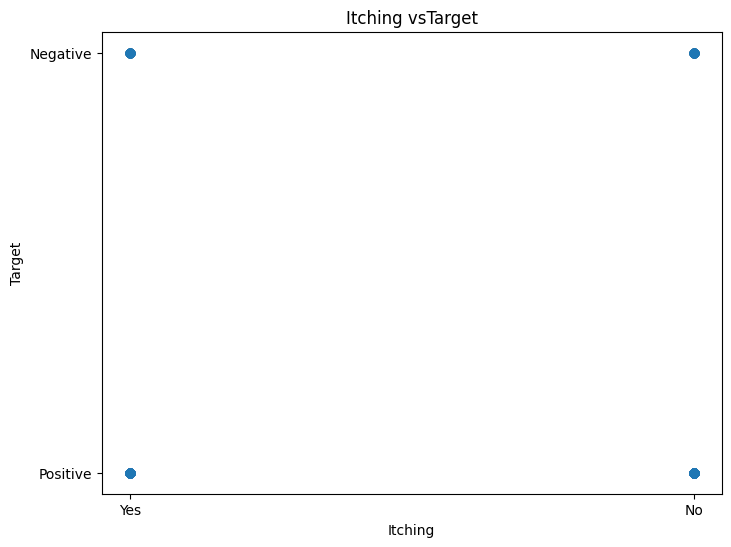

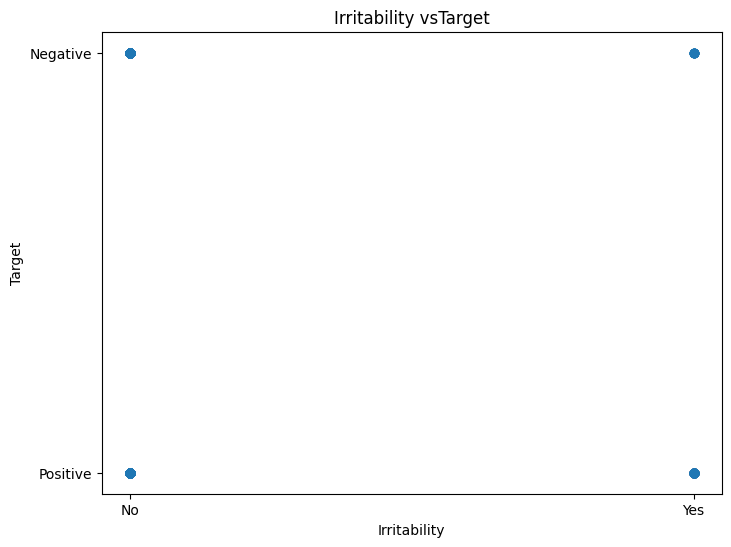

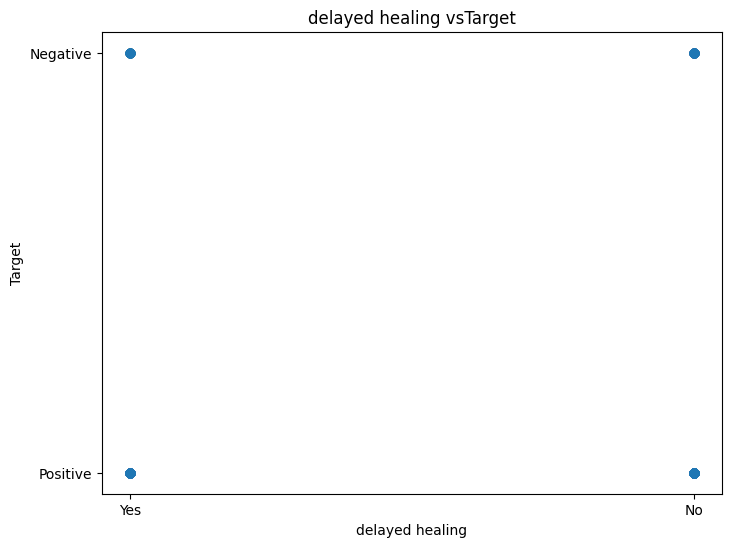

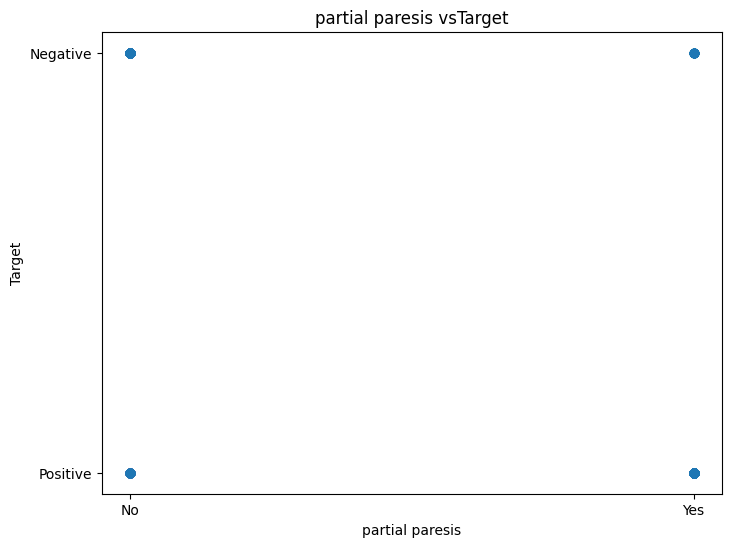

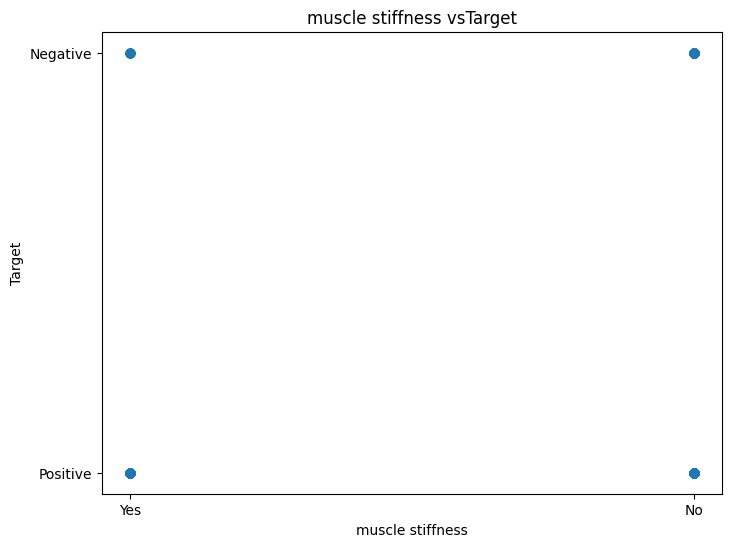

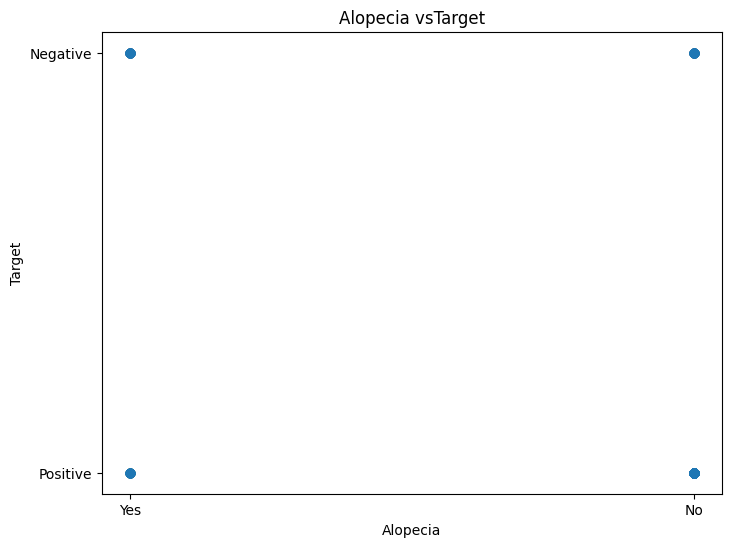

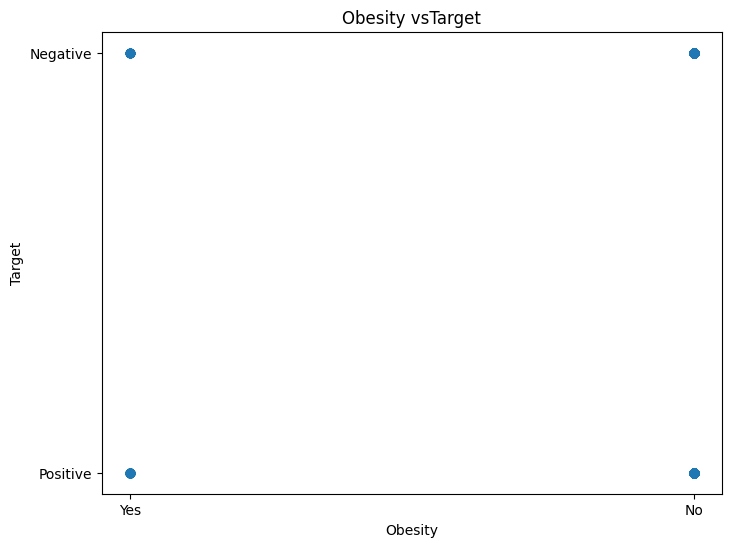

In [ ]:
for column in X.columns:
  plt.figure(figsize=(8,6))
  plt.scatter(X[column],y,alpha=0.5)
  plt.title(f'{column} vsTarget')
  plt.xlabel(column)
  plt.ylabel('Target')
  plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
scaler=MinMaxScaler()
encoder = OneHotEncoder(handle_unknown='ignore')
label_encoder = LabelEncoder()
X_numerical = X.select_dtypes(include=['number'])
X_categorical = X.select_dtypes(exclude=['number'])
X_normalized_num = scaler.fit_transform(X_numerical)
X_normalized_num = pd.DataFrame(X_normalized_num, columns=X_numerical.columns)
X_encoded = encoder.fit_transform(X_categorical)
X_encoded = pd.DataFrame.sparse.from_spmatrix(X_encoded, columns=encoder.
get_feature_names_out(X_categorical.columns))
X_normalized = pd.concat([X_normalized_num, X_encoded], axis=1)
Y_encoded = label_encoder.fit_transform(y)
Y_normalized=scaler.fit_transform(Y_encoded.reshape(-1,1))
Y_normalized=pd.Series(Y_normalized.flatten(),name='Target')
print("Normalized Features:\n",X_normalized.head())
print("Normalized Target:\n",Y_normalized.head())

Normalized Features:
         Age  Gender_Female  Gender_Male  Polyuria_No  Polyuria_Yes  \
0  0.324324            0.0          1.0          1.0           0.0   
1  0.567568            0.0          1.0          1.0           0.0   
2  0.337838            0.0          1.0          0.0           1.0   
3  0.391892            0.0          1.0          1.0           0.0   
4  0.594595            0.0          1.0          0.0           1.0   

   Polydipsia_No  Polydipsia_Yes  sudden weight loss_No  \
0            0.0             1.0                    1.0   
1            1.0             0.0                    1.0   
2            1.0             0.0                    1.0   
3            1.0             0.0                    0.0   
4            0.0             1.0                    0.0   

   sudden weight loss_Yes  weakness_No  ...  delayed healing_No  \
0                     0.0          0.0  ...                 0.0   
1                     0.0          0.0  ...                 1.0   
2